In [2]:
import numpy as np

In [3]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import cv2 as cv

In [5]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow as ims

In [6]:
canvas = np.zeros((100,100,3))

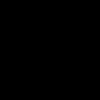

In [7]:
ims(canvas)

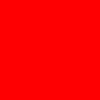

In [8]:
redpatch = canvas
redpatch[:,:,2] =255
ims(redpatch)

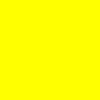

In [9]:
yellow = canvas
yellow[:,:,1:2] = 255
ims(yellow)

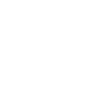

In [10]:
white = canvas
white[:,:,:] = 255
ims(white)

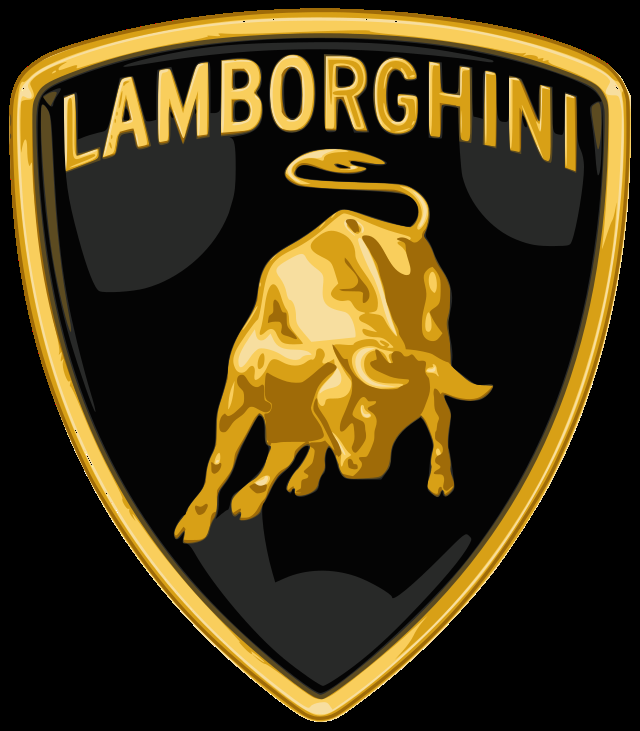

In [12]:
lambo = cv.imread("/content/lambo.png")
ims(lambo)

In [13]:
lambo.shape

(731, 640, 3)

In [14]:
lambo.size

1403520

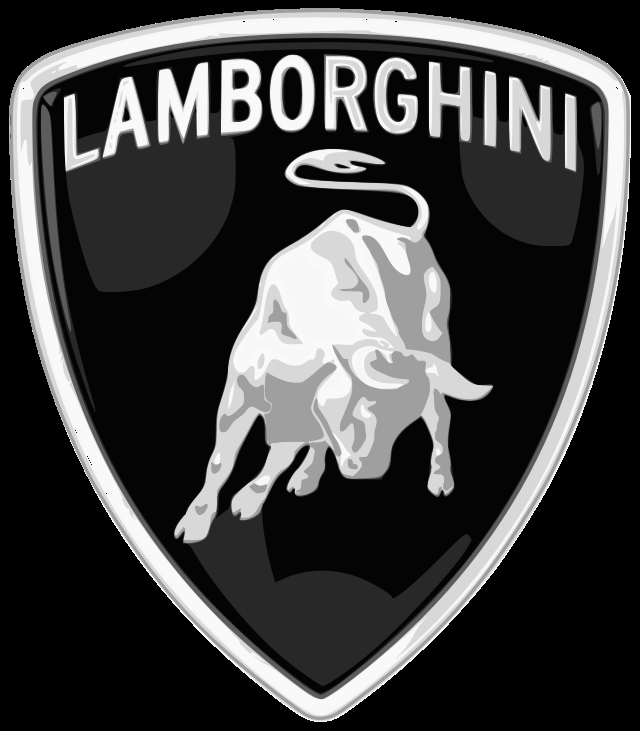

In [15]:
rlamb = lambo[:,:,2]
ims(rlamb)

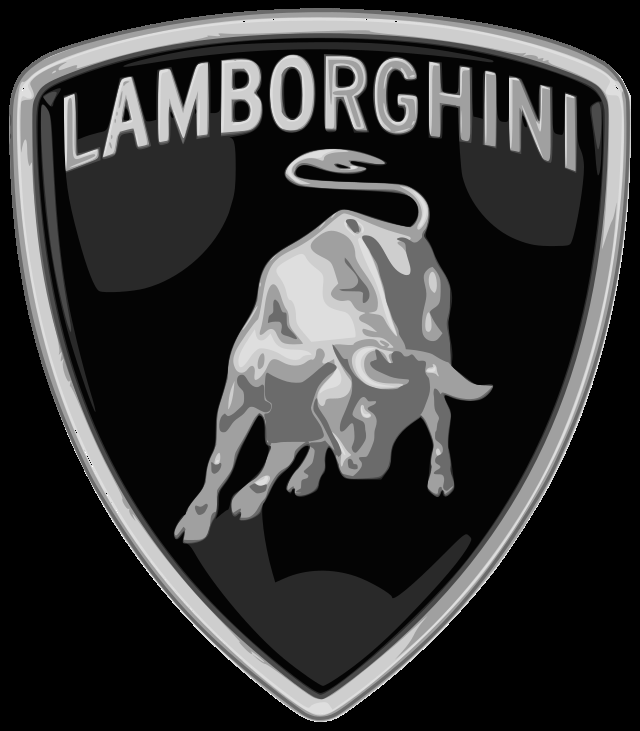

In [16]:
glamb = lambo[:,:,1]
ims(glamb)

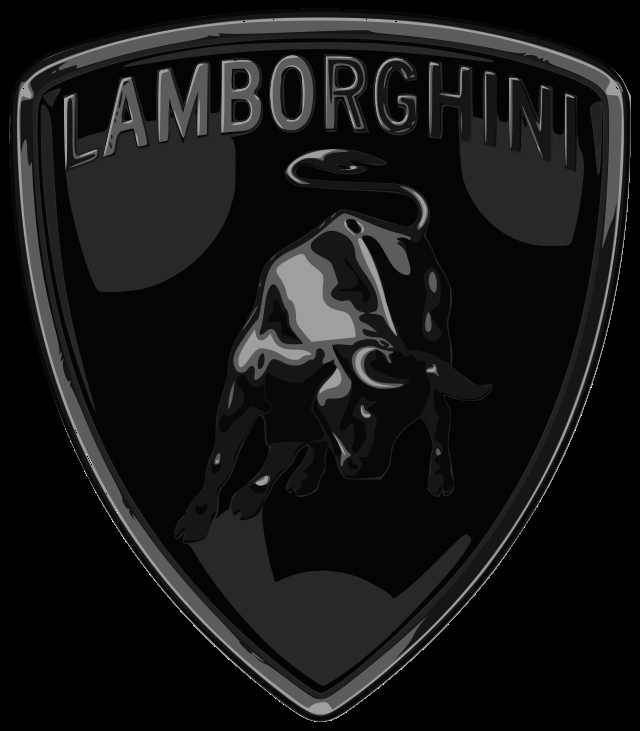

In [59]:
blamb = lambo[:,:,0]
ims(blamb)

# Image processing

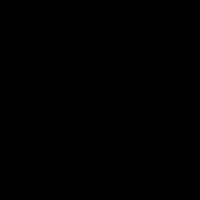

In [96]:
canvas = np.zeros((200,200))
ims(canvas)

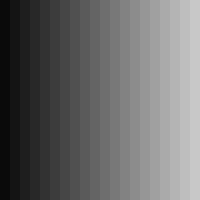

In [97]:
grad = canvas
x = np.arange(0,210,10)
for i in range(0, 200, 10):
    grad[:, i:i+10] += (i+10)
ims(grad)

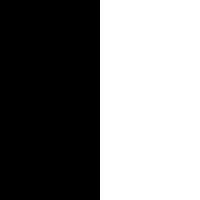

In [98]:
grad[grad > 100] = 255                        #### Binary Filter : threshold 100
grad[grad <= 100] = 0
ims(grad)

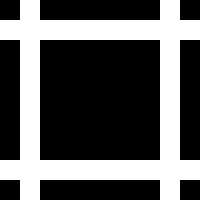

In [100]:
newcanvas = np.zeros((200,200))
newcanvas[:, 20:40] = 255
newcanvas[:, 160:180] = 255
newcanvas[20:40,:] = 255
newcanvas[160:180,:] = 255
ims(newcanvas)

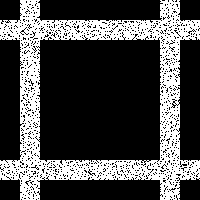

In [104]:
indices = np.random.choice(newcanvas.size, 2000, replace=False)
newcanvas.flat[indices] = 0
ims(newcanvas)

###### Morphology

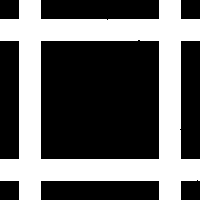

In [115]:
## Dilation 
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(newcanvas, kernel, iterations=1)
ims(dilation)

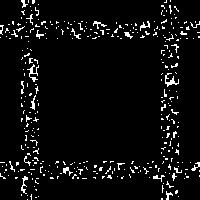

In [113]:
### Erosion
erosion = cv2.erode(newcanvas, kernel,iterations=1) 
ims(erosion)

# ANN 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn
import plotly.express as px

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten
from keras.layers import BatchNormalization
from keras.datasets import mnist
import cv2 
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
from keras.regularizers import l2

In [20]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


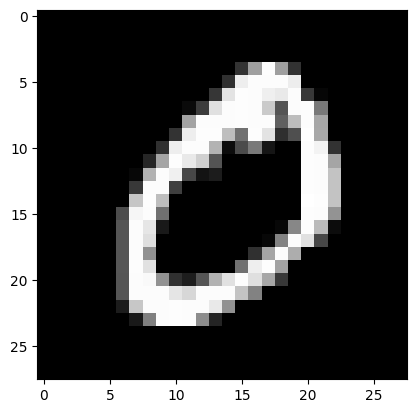

In [21]:
zeroimage = x_train[1]
plt.imshow(zeroimage,cmap ='gray')


In [22]:
x_train_short = x_train[:3000]
x_test_short = x_test[:500]
y_train = y_train[:3000]
y_test = y_test[:500]

x_train = x_train_short.astype('float32')/255
x_test = x_test_short.astype('float32')/255



In [23]:
x_train.shape

(3000, 28, 28)

In [24]:

x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

In [25]:
x_test.shape


(500, 784)

In [26]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [27]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3000, 10)


In [28]:
model1 = Sequential()

In [29]:
## model1.add(Dense(3000, input_shape = (784,), activation= 'sigmoid'))
model1.add(Dense(n_classes, input_shape = (784,), activation = 'softmax'))
model1.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
history = model1.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test)) 
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 1.9089 - accuracy: 0.4500 - val_loss: 1.6895 - val_accuracy: 0.6000
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 1.3671 - accuracy: 0.7303 - val_loss: 1.3450 - val_accuracy: 0.7000
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 1.0922 - accuracy: 0.7830 - val_loss: 1.1421 - val_accuracy: 0.7440
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.9329 - accuracy: 0.8110 - val_loss: 1.0166 - val_accuracy: 0.7640
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8303 - accuracy: 0.8227 - val_loss: 0.9288 - val_accuracy: 0.7760
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7577 - accuracy: 0.8340 - val_loss: 0.8614 - val_accuracy: 0.7900
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.8430 - val_loss: 0.8106 - val_accuracy: 0.7900
Epoch 8/100
9

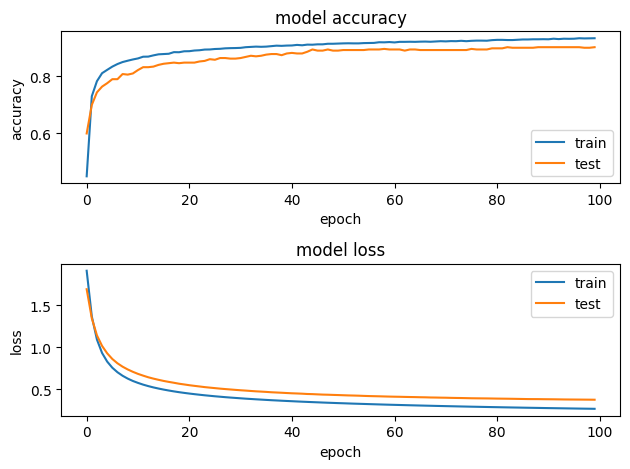

In [31]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [32]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

94/94 - 0s - loss: 0.2684 - accuracy: 0.9337 - 197ms/epoch - 2ms/step
Train Loss 0.2683764100074768
Train Accuracy 0.9336666464805603
16/16 - 0s - loss: 0.3780 - accuracy: 0.9020 - 69ms/epoch - 4ms/step
Test Loss 0.37801921367645264
Test Accuracy 0.9020000100135803


In [33]:
def plot(model_history, plot_type):
    val_type = "val_"+plot_type
    plt.plot(model_history.history[plot_type])
    plt.plot(model_history.history[val_type])
    plt.title(plot_type + ' Plot')
    plt.xlabel('Epoch')
    plt.ylabel(val_type)
    plt.legend(['Train', 'Validation'])
    plt.show()

In [53]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [39]:
model1_history = model1.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9423 - val_loss: 0.3550 - val_accuracy: 0.9080
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9417 - val_loss: 0.3549 - val_accuracy: 0.9080
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9427 - val_loss: 0.3545 - val_accuracy: 0.9120
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9430 - val_loss: 0.3542 - val_accuracy: 0.9080
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9433 - val_loss: 0.3545 - val_accuracy: 0.9080
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9427 - val_loss: 0.3540 - val_accuracy: 0.9080
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9433 - val_loss: 0.3536 - val_accuracy: 0.9080
Epoch 8/100
9

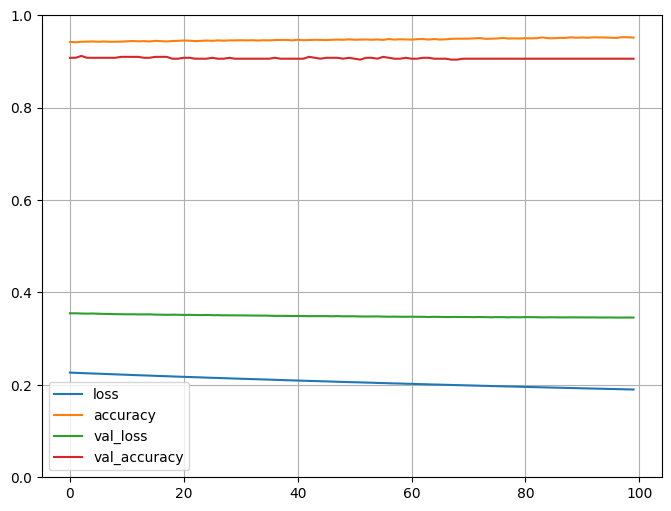

In [40]:
pd.DataFrame(model1_history.history).plot(figsize=(8, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

A Single layer no hidden Layer ANN will not be able to learn much and the loss minimized is very low through the epochs. Hence the introduction of hidden layers is required


### ANN with 1 Hidden layer of 50 neurons and sigmoid activation

In [41]:
### 1 Hidden Layer 

In [42]:
model2 = Sequential()
model2.add(Dense(50, input_shape = (784,), activation= 'sigmoid'))
model2.add(Dense(n_classes, activation = 'softmax'))

model2.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])


model2_history = model2.fit(x_train, y_train, epochs=200, validation_data= (x_test, y_test), callbacks=my_callbacks)


Epoch 1/200
94/94 [==============================] - 1s 5ms/step - loss: 2.2779 - accuracy: 0.1467 - val_loss: 2.2116 - val_accuracy: 0.1900
Epoch 2/200
94/94 [==============================] - 0s 3ms/step - loss: 2.1473 - accuracy: 0.3860 - val_loss: 2.1209 - val_accuracy: 0.4580
Epoch 3/200
94/94 [==============================] - 0s 3ms/step - loss: 2.0511 - accuracy: 0.5630 - val_loss: 2.0377 - val_accuracy: 0.5640
Epoch 4/200
94/94 [==============================] - 0s 3ms/step - loss: 1.9583 - accuracy: 0.6467 - val_loss: 1.9568 - val_accuracy: 0.6060
Epoch 5/200
94/94 [==============================] - 0s 3ms/step - loss: 1.8685 - accuracy: 0.6920 - val_loss: 1.8803 - val_accuracy: 0.6200
Epoch 6/200
94/94 [==============================] - 0s 3ms/step - loss: 1.7810 - accuracy: 0.7007 - val_loss: 1.8033 - val_accuracy: 0.6560
Epoch 7/200
94/94 [==============================] - 0s 3ms/step - loss: 1.6965 - accuracy: 0.7363 - val_loss: 1.7301 - val_accuracy: 0.6780
Epoch 8/200
9

94/94 - 0s - loss: 0.2385 - accuracy: 0.9383 - 135ms/epoch - 1ms/step
Train Loss 0.23847198486328125
Train Accuracy 0.9383333325386047
16/16 - 0s - loss: 0.3479 - accuracy: 0.9020 - 44ms/epoch - 3ms/step
Test Loss 0.34787654876708984
Test Accuracy 0.9020000100135803


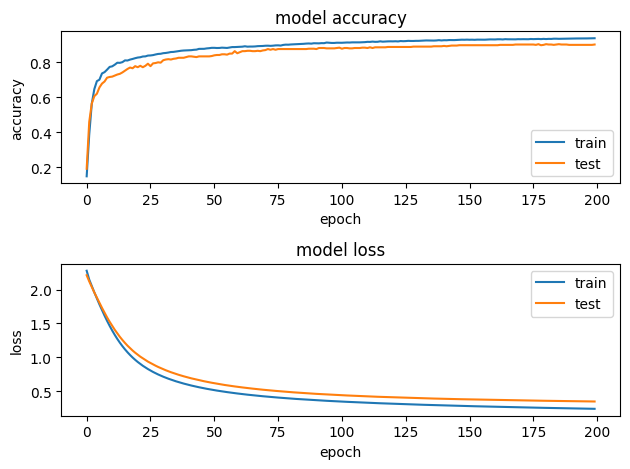

In [43]:
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


ANN with 1 hidden layer learns well thorught the epocs and results in a test accuracy of 0.9, Model is still learning and would require more epochs to train but that might also result in overfitting 

### Model 3 : 2 Hidden Layers 

In [44]:
model3 = Sequential()
model3.add(Dense(50, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation= 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))

model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])


model3_history = model3.fit(x_train, y_train, epochs=400, validation_data= (x_test, y_test), callbacks=my_callbacks)

Epoch 1/400
94/94 [==============================] - 1s 7ms/step - loss: 2.3400 - accuracy: 0.1223 - val_loss: 2.2838 - val_accuracy: 0.1400
Epoch 2/400
94/94 [==============================] - 0s 4ms/step - loss: 2.2821 - accuracy: 0.1587 - val_loss: 2.2783 - val_accuracy: 0.1400
Epoch 3/400
94/94 [==============================] - 0s 5ms/step - loss: 2.2755 - accuracy: 0.1660 - val_loss: 2.2724 - val_accuracy: 0.1780
Epoch 4/400
94/94 [==============================] - 0s 5ms/step - loss: 2.2688 - accuracy: 0.1973 - val_loss: 2.2666 - val_accuracy: 0.2420
Epoch 5/400
94/94 [==============================] - 0s 3ms/step - loss: 2.2611 - accuracy: 0.2127 - val_loss: 2.2605 - val_accuracy: 0.1340
Epoch 6/400
94/94 [==============================] - 0s 3ms/step - loss: 2.2544 - accuracy: 0.2390 - val_loss: 2.2515 - val_accuracy: 0.1860
Epoch 7/400
94/94 [==============================] - 0s 3ms/step - loss: 2.2467 - accuracy: 0.2387 - val_loss: 2.2475 - val_accuracy: 0.2800
Epoch 8/400
9

94/94 - 0s - loss: 0.1745 - accuracy: 0.9553 - 145ms/epoch - 2ms/step
Train Loss 0.17445868253707886
Train Accuracy 0.9553333520889282
16/16 - 0s - loss: 0.3247 - accuracy: 0.9000 - 42ms/epoch - 3ms/step
Test Loss 0.3246585428714752
Test Accuracy 0.8999999761581421


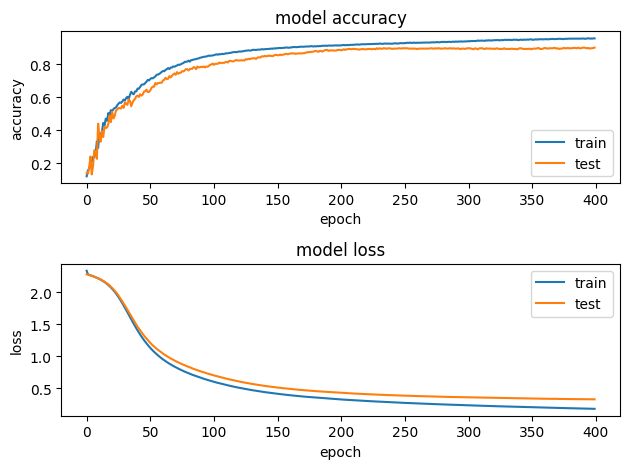

In [45]:
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


ANN model with 2 hidden layers is able to minimize the loss more than a single hidden layer, the Test accuracy of the 2 hidden layer is 0.9 but the train accuracy is 0.95, therefore the model is slightly overfitted, it should stop at an earlier epoch ideally


## ANN Model with Dropout and batch normalization, 
### Model 4 = Adam
### Model 5 = SGD

In [46]:
model4= Sequential()
model4.add(Dropout(0.2,input_shape=(784,)))
model4.add(Dense(500, activation= 'sigmoid',kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(rate=0.5))
model4.add(Dense(500, activation = 'relu', kernel_regularizer=l2(l=0.005),kernel_initializer='uniform'))
model4.add(BatchNormalization())
model4.add(Dropout(rate=0.5))
model4.add(Dense(n_classes, activation = 'softmax'))

model4.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

model5 = model4
model5.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                      

In [47]:
model4_history = model4.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Epoch 1/100
94/94 [==============================] - 3s 17ms/step - loss: 4.0389 - accuracy: 0.5880 - val_loss: 4.6146 - val_accuracy: 0.3860
Epoch 2/100
94/94 [==============================] - 1s 12ms/step - loss: 3.3815 - accuracy: 0.7623 - val_loss: 4.1746 - val_accuracy: 0.6360
Epoch 3/100
94/94 [==============================] - 1s 12ms/step - loss: 3.1992 - accuracy: 0.8103 - val_loss: 3.6296 - val_accuracy: 0.7920
Epoch 4/100
94/94 [==============================] - 1s 12ms/step - loss: 3.0799 - accuracy: 0.8273 - val_loss: 3.1379 - val_accuracy: 0.8660
Epoch 5/100
94/94 [==============================] - 1s 12ms/step - loss: 3.0220 - accuracy: 0.8367 - val_loss: 2.8671 - val_accuracy: 0.9060
Epoch 6/100
94/94 [==============================] - 1s 12ms/step - loss: 2.9263 - accuracy: 0.8560 - val_loss: 2.7183 - val_accuracy: 0.9200
Epoch 7/100
94/94 [==============================] - 1s 12ms/step - loss: 2.8782 - accuracy: 0.8550 - val_loss: 2.6484 - val_accuracy: 0.9260
Epoch 

In [48]:
model5_history = model5.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Epoch 1/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5898 - accuracy: 0.9650 - val_loss: 0.6033 - val_accuracy: 0.9600
Epoch 2/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5701 - accuracy: 0.9667 - val_loss: 0.6003 - val_accuracy: 0.9500
Epoch 3/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5772 - accuracy: 0.9607 - val_loss: 0.5875 - val_accuracy: 0.9520
Epoch 4/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5568 - accuracy: 0.9683 - val_loss: 0.5927 - val_accuracy: 0.9480
Epoch 5/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5439 - accuracy: 0.9690 - val_loss: 0.5819 - val_accuracy: 0.9400
Epoch 6/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5620 - accuracy: 0.9567 - val_loss: 0.5649 - val_accuracy: 0.9560
Epoch 7/100
94/94 [==============================] - 1s 12ms/step - loss: 0.5455 - accuracy: 0.9633 - val_loss: 0.5685 - val_accuracy: 0.9520
Epoch 

94/94 - 0s - loss: 0.2622 - accuracy: 0.9990 - 303ms/epoch - 3ms/step
Train Loss 0.2622440457344055
Train Accuracy 0.9990000128746033
16/16 - 0s - loss: 0.4020 - accuracy: 0.9500 - 69ms/epoch - 4ms/step
Test Loss 0.4020303785800934
Test Accuracy 0.949999988079071


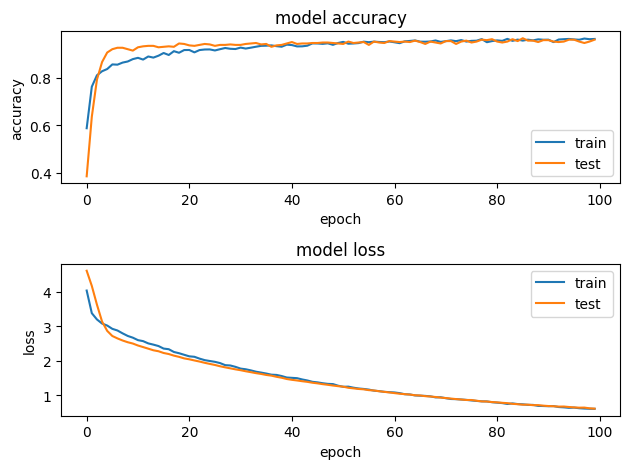

In [49]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model4_history.history['accuracy'])
plt.plot(model4_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

94/94 - 0s - loss: 0.2622 - accuracy: 0.9990 - 312ms/epoch - 3ms/step
Train Loss 0.2622440457344055
Train Accuracy 0.9990000128746033
16/16 - 0s - loss: 0.4020 - accuracy: 0.9500 - 77ms/epoch - 5ms/step
Test Loss 0.4020303785800934
Test Accuracy 0.949999988079071


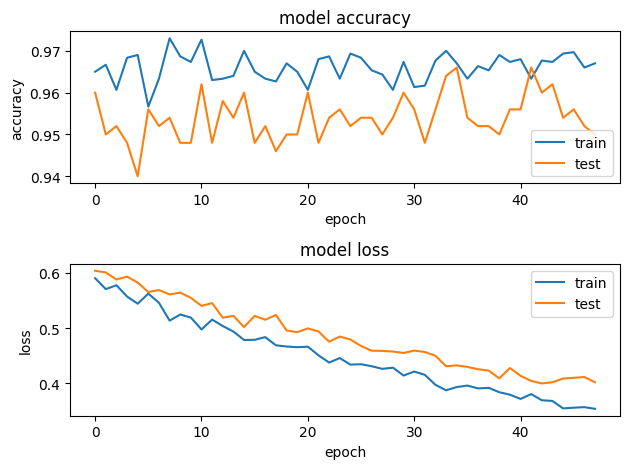

In [50]:
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model5_history.history['loss'])
plt.plot(model5_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

As we compare the graphs of ADAM and SGD we can observe that the ADAM is taking big steps initally and small steps later on but SGD Steps are relatively Linear


## CNN 

In [51]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train[:3000]
x_test = x_test[:500]
y_train = y_train[:3000]
y_test = y_test[:500]
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)


In [55]:
model6 = Sequential()
model6.add(Conv2D(10, kernel_size = 3,input_shape=(28,28,1) ,activation = 'relu',padding="Same"))
model6.add(Conv2D(15, kernel_size = 3,activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(10, activation= 'sigmoid',kernel_regularizer=l2(l=0.005)))
model6.add(Dense(20, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model6.add(Dense(n_classes, activation = 'softmax'))

model6.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model6.summary()

model6_history = model6.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 15)        1365      
                                                                 
 flatten_1 (Flatten)         (None, 10140)             0         
                                                                 
 dense_12 (Dense)            (None, 10)                101410    
                                                                 
 dense_13 (Dense)            (None, 20)                220       
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
Total params: 103,305
Trainable params: 103,305
Non-tr

94/94 - 1s - loss: 0.1665 - accuracy: 0.9893 - 817ms/epoch - 9ms/step
Train Loss 0.16653786599636078
Train Accuracy 0.9893333315849304
16/16 - 0s - loss: 0.3291 - accuracy: 0.9400 - 164ms/epoch - 10ms/step
Test Loss 0.32906851172447205
Test Accuracy 0.9399999976158142


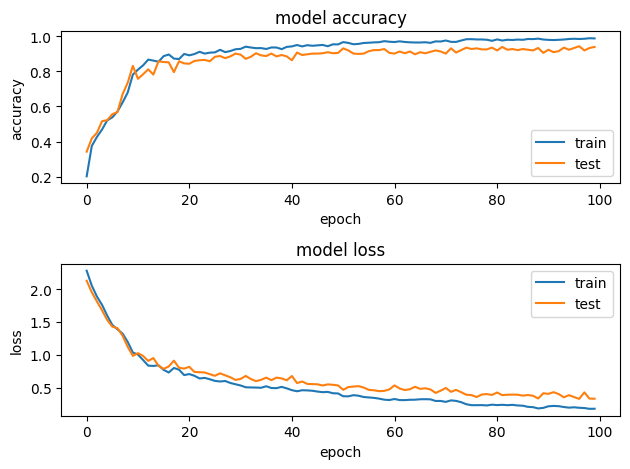

In [56]:
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model6_history.history['accuracy'])
plt.plot(model6_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model6_history.history['loss'])
plt.plot(model6_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

With the implementation of CNN we can observe that the difference in acccurcy of Normal ANN and CNN is quite large, maximum of ANN test Accuracy would be 0.90 but on CNN we are able to achieve 0.93 Test accuracy which can be improved further by using Batch normalization and Dropout

### with batch normalization and dropout 

In [57]:
model7 = Sequential()
model7.add(Conv2D(10, kernel_size = 3,input_shape=(28,28,1) ,activation = 'relu',padding="Same"))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.2))
model7.add(Conv2D(15, kernel_size = 3,activation = 'relu'))
model7.add(Flatten())
model7.add(Dense(10, activation= 'sigmoid',kernel_regularizer=l2(l=0.005)))
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.4))
model7.add(Dense(20, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model7.add(Dense(n_classes, activation = 'softmax'))

model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

model7_history = model7.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 10)       40        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 10)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 15)        1365      
                                                                 
 flatten_2 (Flatten)         (None, 10140)             0         
                                                                 
 dense_15 (Dense)            (None, 10)                101410    
                                                      

94/94 - 2s - loss: 0.2308 - accuracy: 0.9943 - 2s/epoch - 20ms/step
Train Loss 0.23075805604457855
Train Accuracy 0.9943333268165588
16/16 - 0s - loss: 0.3889 - accuracy: 0.9420 - 184ms/epoch - 11ms/step
Test Loss 0.38889145851135254
Test Accuracy 0.9419999718666077


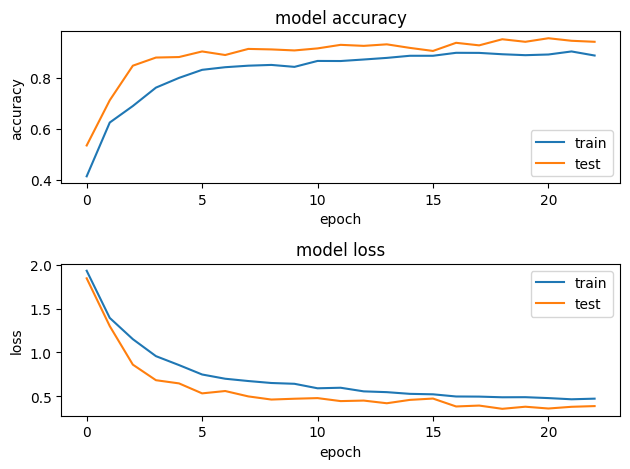

In [58]:
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model7_history.history['accuracy'])
plt.plot(model7_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model7_history.history['loss'])
plt.plot(model7_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

with batch normalization and dropout the models test accuracy comparitively higher than the one without batch normalization and dropout, modifying the hyperparameters may lead to higher efficiency model 